In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json 
import os



mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'



## A problem's graph example

/Users/alejomonbar/Documents/GitHub/Benchmarking-neutral-atom-QPUs/.conda/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


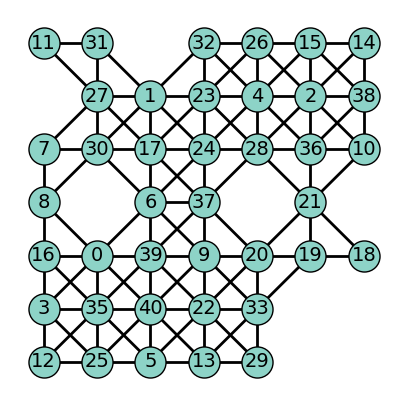

In [10]:
nq = 41
colors= plt.get_cmap("Set3")
backend_name = "braket_emulator"
with open(f"./Data/problems/{nq}.json", "r") as file:
    problem = json.load(file)
fig, ax = plt.subplots(figsize=(5,5))
G = nx.Graph()
G.add_edges_from(problem["edges"])
nx.draw(G, pos=problem["pos"], with_labels=True, node_size=500, node_color=colors(0), font_size=14, edgecolors="black", ax=ax, width=2)
# fig.savefig(f"./Figures/Graphs/{nq}.pdf", bbox_inches="tight", transparent=True)

## Quantum Adiabatic Algorithm (QAA) protocol

Text(0, 0.5, '$\\Omega$ (MHz)')

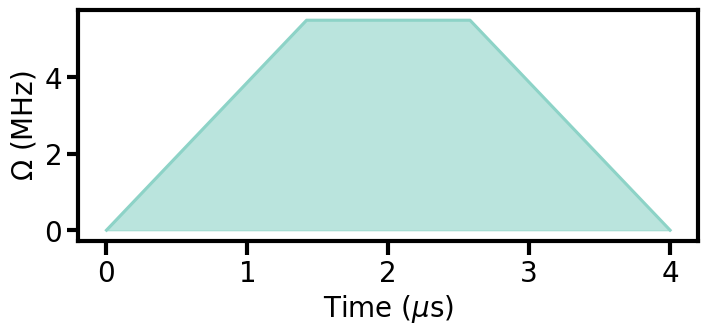

In [3]:
with open("./Data/opt_schedule_QAA.json", "r") as file:
    schedule = json.load(file)

omegas = schedule["omega_list"]
deltas = schedule["delta_list"]
times = schedule["times"]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(omegas), color= colors(0))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(omegas), color= colors(0), alpha=0.6)
ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"$\Omega$ (MHz)")
# fig.savefig("./Figures/omegas_QAA.pdf", bbox_inches="tight", transparent=True)

Text(0, 0.5, '$\\Delta$ (MHz)')

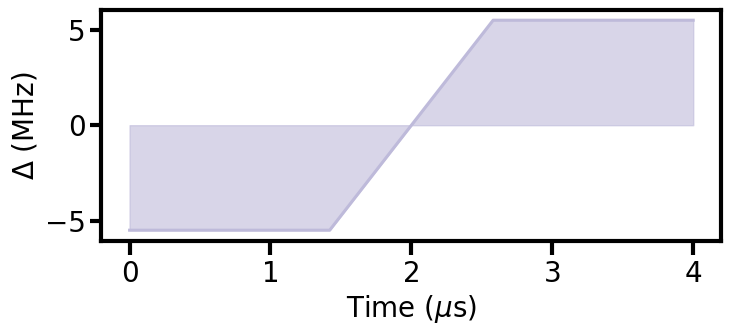

In [4]:
with open("./Data/opt_schedule_QAA.json", "r") as file:
    schedule = json.load(file)

omegas = schedule["omega_list"]
deltas = schedule["delta_list"]
times = schedule["times"]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(deltas), color= colors(2))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(deltas), color= colors(2), alpha=0.6)
ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"$\Delta$ (MHz)")
# fig.savefig("./Figures/deltas_QAA.pdf", bbox_inches="tight", transparent=True)

## Similar concept to the Quantum Approximate Optimization Algorithm (QAOA)

Text(0, 0.5, '$\\Omega$ (MHz)')

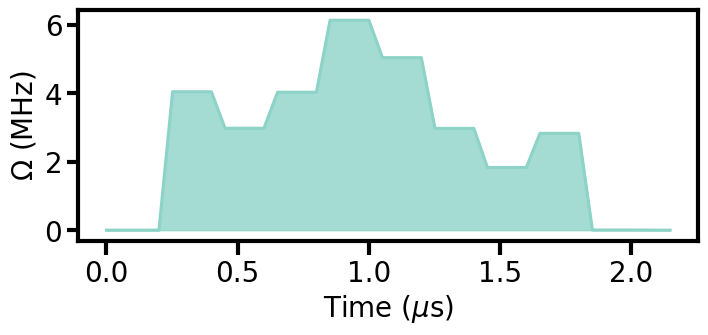

In [6]:
with open("./Data/opt_schedule.json", "r") as file:
    schedule = json.load(file)

omegas = [0,0] + [i for i in schedule["omega_list"] for _ in range(2)] + [0]
deltas = [0,0] + [i for i in schedule["delta_list"] for _ in range(2)] + [0]
phis = len(omegas) * [0]
num_pulses = len(schedule["omega_list"])

t_tot = 2.0e-6
t_q = 0.052e-6
t_p = t_tot/num_pulses-t_q
t_delay = 0 #round(1.95e-6,9)
times = [0 , t_delay]
t_i = t_delay
for i in range(0, num_pulses):
    t_i += round(t_q,9)
    times.append(t_i)
    t_i += round(t_p,9)
    times.append(t_i)
times.append(round(t_i+t_p,9))

fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(omegas), color= colors(0))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(omegas), color= colors(0), alpha=0.8)
ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"$\Omega$ (MHz)")
# fig.savefig("./Figures/omegas.pdf", bbox_inches="tight", transparent=True)

Text(0, 0.5, '$\\Delta$ (MHz)')

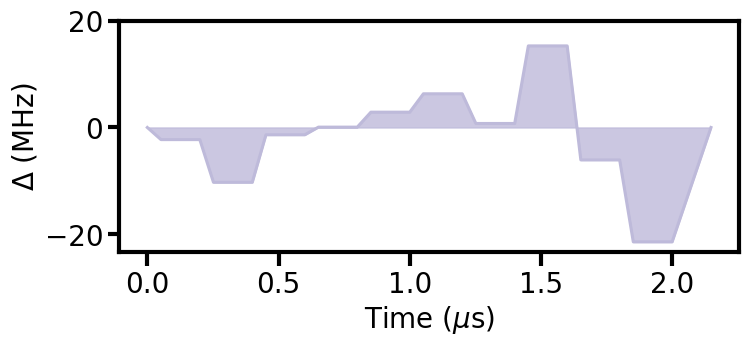

In [7]:
fig, ax = plt.subplots(figsize=(8,3))
colors = plt.get_cmap("Set3")
ax.plot(1e6*np.array(times), 1e-6*np.array(deltas), color= colors(2))
ax.fill_between(1e6*np.array(times), phis, 1e-6*np.array(deltas), color= colors(2), alpha=0.8)
ax.set_yticks([-20,0,20])
ax.set_xlabel("Time ($\mu$s)")
ax.set_ylabel(r"$\Delta$ (MHz)")
# fig.savefig("./Figures/deltas.pdf", bbox_inches="tight", transparent=True)

## Comparison between the 2 QPUs to solve Maximal independent set problem (MIS) and the ideal case

Text(0, 0.5, 'Probability')

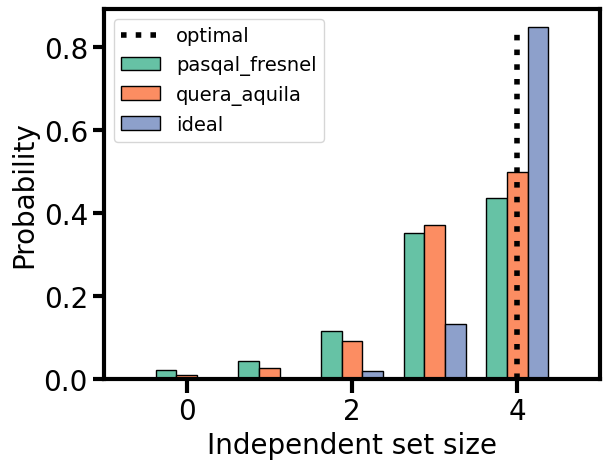

In [8]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila","braket_emulator"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila","braket_emulator":"ideal"}
colors= plt.get_cmap("Set2")
time = "t_4e-06"
results = {}
case = 1
for backend_name in backends:
    with open(f"./Data/{backend_name}/QAA/{case}/{nq}_{time}.json", "r") as file:
        results[backend_name] = json.load(file)
width = 0.25
fig, ax = plt.subplots()
for nn, backend_name in enumerate(backends):
    keys = np.array([-int(i) for i in results[backend_name]["cost"].keys()])
    res_i = [results[backend_name]["cost"][str(-i)]/sum(results[backend_name]["cost"].values())  for i in keys]
    ax.bar(keys+width*nn-width*(len(backends)-1)/2, res_i, label=label[backend_name], edgecolor="black",width=width, color=colors(nn))
ax.vlines(-results[backend_name]["min_cost"], 0, max(res_i), color="black", linestyle=":", label="optimal", linewidth=4)
ax.legend()
ax.set_xlim(-1,5)
ax.set_xticks([0,2,4])
os.makedirs(f"./Figures/{backend_name}/", exist_ok=True)
ax.set_xlabel("Independent set size")
ax.set_ylabel("Probability")
# fig.savefig(f"./Figures/{nq}_comparison_QPUs.pdf", bbox_inches="tight", transparent=True)

## Preparation error in QuEra Aquila

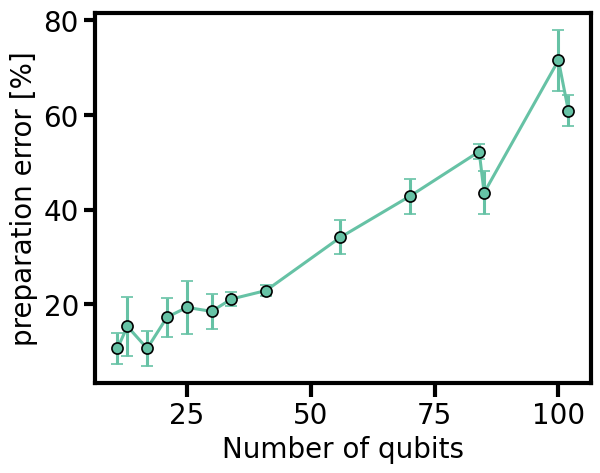

In [92]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85,100,102]
total_defects = []
for extra in ["", "_1", "_2"]:
    defects = []
    for nq in nqs:
        with open(f"./Data/{backend_name}/{nq}{extra}.json", "r") as file:
            results = json.load(file)
        if "shots" not in results:
            results["shots"] = 100 if nq <= 30 else 200
        defects.append(results["defects"]/results["shots"])
    total_defects.append(defects)
total_defects = 100*np.array(total_defects).T
ax.errorbar(nqs, total_defects.mean(axis=1), total_defects.std(axis=1), capsize=4, marker="o", label=backend_name, color=colors(0), markeredgecolor="black", markersize=8)
ax.set_xlabel("Number of qubits")
ax.set_ylabel("preparation error [%]")
fig.savefig(f"./Figures/{backend_name}/defects.pdf", bbox_inches="tight", transparent=True)

## Comparison between QuEra Aquila and Pasqal Fresnel to solve problems up to 101 qubits

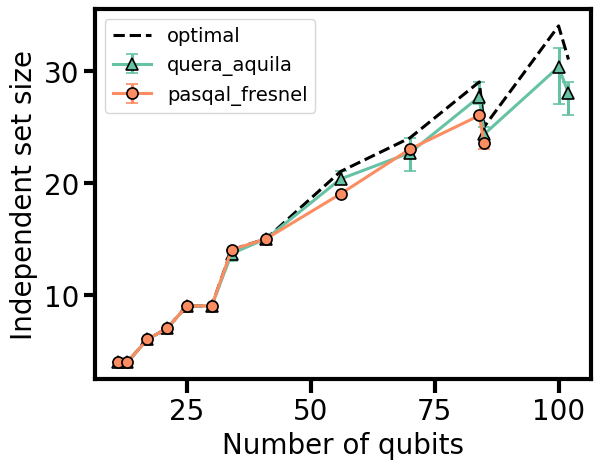

In [13]:
fig, ax = plt.subplots()
backend_name = "quera_aquila"
# backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
method = "QAA"
case = 1
time = "t_4e-06"
mitig = False
for ii, backend_name in enumerate(["quera_aquila", "pasqal_fresnel"]):
    nqs = {"quera_aquila":[11,13,17,21,25,30,34,41,56,70,84,85,100,102], "pasqal_fresnel":[11,13,17,21,25,30,34,41,56,70,84,85]}[backend_name]
    # nqs = [11,13,17,21,25,30,34,41]
    total_cost = []
    opt_cost = []
    for case in [1,2,3] if backend_name == "quera_aquila" else [2,3]:
        cost = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}_{time}.json", "r") as file:
                results = json.load(file)
            cost.append(min([int(i) for i in results[f"greedy_cost" if mitig == True else "cost"].keys()]))
            if case == 2:
                opt_cost.append(results["min_cost"])
        total_cost.append(cost)
        
    total_cost = -1*np.array(total_cost).T
    ax.errorbar(nqs, total_cost.mean(axis=1), [-1*(total_cost.min(axis=1)-total_cost.mean(axis=1)),-1*(total_cost.mean(axis=1)- total_cost.max(axis=1))], capsize=4, marker="o" if backend_name=="pasqal_fresnel" else "^", label=backend_name, color=colors(ii), markeredgecolor="black", markersize=8)
    if backend_name == "quera_aquila":
        ax.plot(nqs, -np.array(opt_cost), color="black", linestyle="--", label="optimal")
ax.set_xlabel("Number of qubits")
ax.set_ylabel("Independent set size")
ax.legend()
# fig.savefig(f"./Figures/cost_comparison.pdf", bbox_inches="tight", transparent=True)

## Probability of success problems $N_q \le 30$ (probability of finding the maximal  inpdependent set)

quera_aquila [11, 13, 17, 21, 25, 30] [0.47849923 0.48451248 0.18844154 0.12464815 0.12389219 0.16827221] [0.08852075 0.0566003  0.04559515 0.03045692 0.00306125 0.03248126]
pasqal_fresnel [11, 13, 17, 21, 25, 30] [0.289 0.233 0.049 0.005 0.026 0.014] [0.005 0.025 0.009 0.003 0.006 0.01 ]


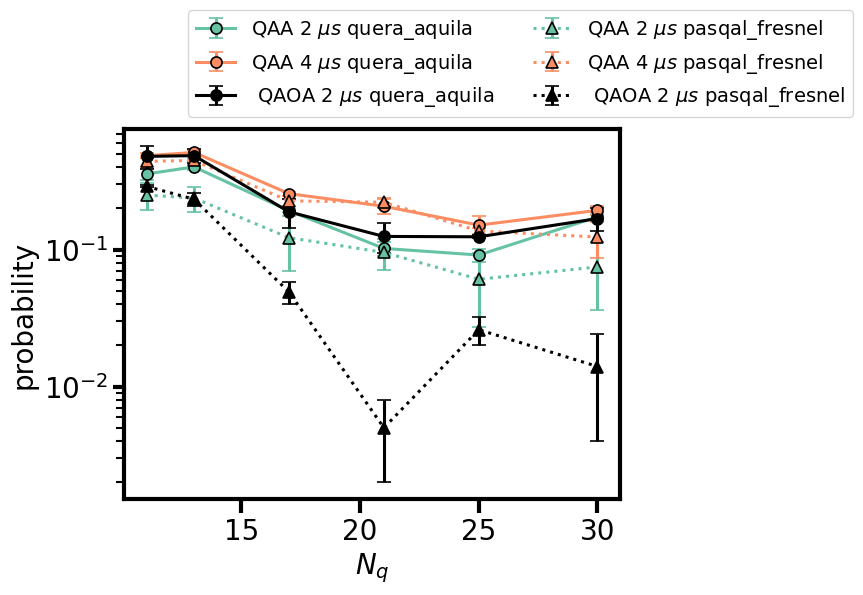

In [15]:
fig, ax = plt.subplots()
backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,17,21,25,30]
total_cost = []
opt_cost = []
backend_probs = {}
backned_nqs = {}
time = 1e-6
case = 1
for ii, time in enumerate([2e-6, 4e-6]):
    for backend_name in backends_list:
        prob_list = []
        for case in [1,2,3]:
            prob = []
            nqs_used = []
            for nq in nqs:
                with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{time}.json", "r") as file:
                    results = json.load(file)
                if str(results["min_cost"]) in results["cost"].keys():
                    prob.append(results["cost"][str(results["min_cost"])]/sum(results["cost"].values()))
                    nqs_used.append(nq)
            prob_list.append(prob)
        backend_probs[backend_name] = np.array(prob_list)
        backned_nqs[backend_name] = nqs_used
        
    # total_cost = np.array(total_cost).T
    for jj, backend_name in enumerate(backend_probs):
        ax.errorbar(backned_nqs[backend_name], backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0), label="QAA " + str(round(time*1e6)) + r" $\mu s$ "+backend_name, marker="o" if backend_name=="quera_aquila" else "^", color=colors(ii), markeredgecolor="black", markersize=8, linestyle="-" if backend_name=="quera_aquila" else ":")
    # ax.set_xlabel("Number of qubits")

backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [11,13,17,21,25,30,34,41,56,70,84,85]
total_cost = []
opt_cost = []
backend_probs = {}

for backend_name in backends_list:
    prob_list = []
    for case in [1,2,3] if backend_name=="quera_aquila" else [2,3]:
        prob = []
        nqs_used = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/QAOA/{case}/{nq}.json", "r") as file:
                results = json.load(file)
            if str(results["min_cost"]) in results["cost"].keys():
                prob.append(results["cost"][str(results["min_cost"])]/sum(results["cost"].values()))
                nqs_used.append(nq)
        prob_list.append(prob)
    backned_nqs[backend_name] = nqs_used
    backend_probs[backend_name] = np.array(prob_list)

    
# total_cost = np.array(total_cost).T
for jj, backend_name in enumerate(backend_probs):
    ax.errorbar(backned_nqs[backend_name], backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0), label=r" QAOA 2 $\mu s$" +f" {backend_name}", marker="o" if backend_name=="quera_aquila" else "^", linestyle="-" if backend_name=="quera_aquila" else ":", color="black", markeredgecolor="black", markersize=8)
    print(backend_name, backned_nqs[backend_name], backend_probs[backend_name].mean(axis=0), backend_probs[backend_name].std(axis=0))

# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Reorder them manually (for example: Third, First, Second)
order = [0,2,4,1,3,5]

ax.set_ylabel(r"probability")
ax.set_xlabel(r"$N_q$")
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper center", bbox_to_anchor=(0.8,1.35), ncol=2)
ax.set_yscale("log")
# fig.savefig(f"./Figures/probability_summary.pdf", bbox_inches="tight", transparent=True)

## Probability of success problems $N_q > 30$ (probability of finding the maximal  inpdependent set)

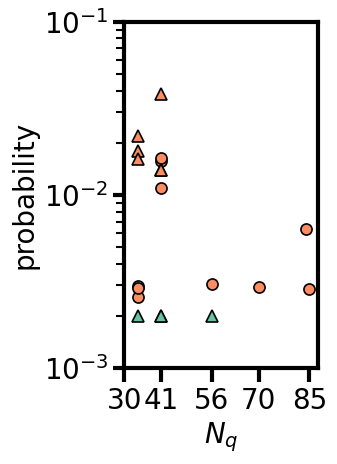

In [17]:
fig, ax = plt.subplots(figsize=(2.5,4.5))
backend_name = "pasqal_fresnel"
colors= plt.get_cmap("Set2")
backends_list = ["quera_aquila", "pasqal_fresnel"]
nqs = [34, 41,56,70,84,85]
total_cost = []
opt_cost = []
backend_probs = {}
backned_nqs = {}
time = 1e-6
case = 1
for ii, time in enumerate([2e-6, 4e-6]):
    for backend_name in backends_list:
        prob_list = []
        for case in [1,2,3]:
            prob = []
            nqs_used = []
            for nq in nqs:
                with open(f"./Data/{backend_name}/QAA/{case}/{nq}_t_{time}.json", "r") as file:
                    results = json.load(file)
                if str(results["min_cost"]) in results["cost"].keys():
                    prob.append(results["cost"][str(results["min_cost"])]/sum(results["cost"].values()))
                    nqs_used.append(nq)
            ax.plot(nqs_used, prob, marker="o" if backend_name=="quera_aquila" else "^", linewidth=0, color=colors(ii), markeredgecolor="black", markersize=8)
ax.set_ylabel(r"probability")
ax.set_xlabel(r"$N_q$")

ax.set_yscale("log")
ax.set_yticks([0.1,0.01,0.001])
ax.set_xticks([30, 41,56,70,85])
# fig.savefig(f"./Figures/probability_summary_large.pdf", bbox_inches="tight", transparent=True)

## Valid counts for QuEra Aquila and Pasqal Fresnel

pasqal_fresnel [0.65266667 0.66133333 0.50466667 0.61933333 0.50533333 0.40066667
 0.59466667 0.53933333 0.07266667 0.052      0.02866667 0.03066667]
quera_aquila [0.67333333 0.694      0.546      0.57733333 0.474      0.512
 0.36533333 0.422      0.31066667 0.19733333 0.12533333 0.17466667]


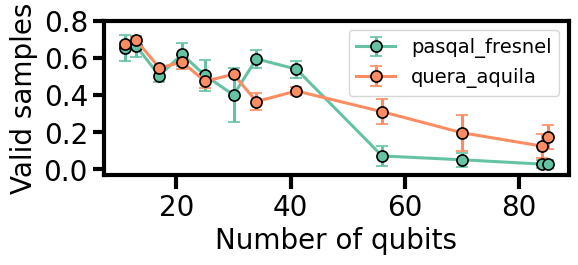

In [20]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila"}
colors = plt.get_cmap("Set2")
method = "QAA"
extra = "_t_4e-06"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85]
fig, ax = plt.subplots(figsize=(6,2))
cases = [1,2,3]
for i, backend_name in enumerate(backends):
    valid_cases = []
    for case in cases:
        valid_counts = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}{extra}.json", "r") as file:
                result = json.load(file)
            valid_counts.append(result["valid"])
        valid_cases.append(valid_counts)
    valid_cases = np.array(valid_cases)
    print(backend_name, valid_cases.mean(axis=0)/500)

    ax.errorbar(np.array(nqs), valid_cases.mean(axis=0)/500, yerr= valid_cases.std(axis=0)/500, color=colors(i), label=label[backend_name], marker="o", markersize=8, markeredgecolor="black", capsize=4)
ax.set_xlabel("Number of qubits")
ax.set_ylabel("Valid samples")
ax.set_yticks([0.0,0.2,0.4,0.6,0.8])
ax.legend();
# fig.savefig(f"./Figures/valid_counts_comparison.pdf", bbox_inches="tight", transparent=True)

## Approximation ratio of valid solutions

pasqal_fresnel [0.90661639 0.90817732 0.87004419 0.86411015 0.86908355 0.88284863
 0.79906498 0.80917847 0.73722768 0.78774671 0.7297318  0.76815385]
quera_aquila [0.90082958 0.91007996 0.87264822 0.85088987 0.86340611 0.88188976
 0.76412958 0.79591639 0.80453754 0.83443101 0.79620613 0.82014006]


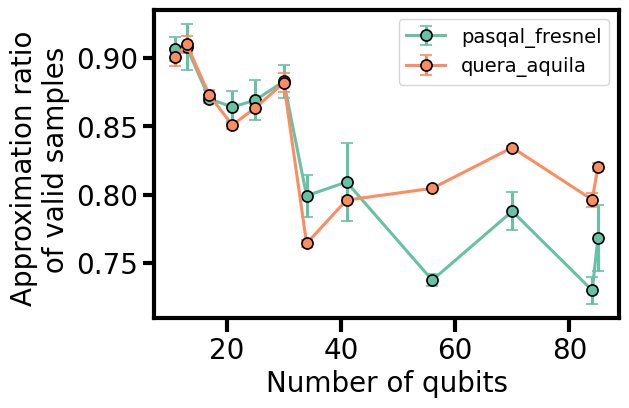

In [25]:
nq = 13
backends = ["pasqal_fresnel","quera_aquila"]
label = {"pasqal_fresnel":"pasqal_fresnel","quera_aquila":"quera_aquila"}

backend_name = "quera_aquila"
method = "QAA"
case = 1
extra = "_t_4e-06"
nqs = [11,13,17,21,25,30,34,41,56,70,84,85]
fig, ax = plt.subplots(figsize=(6,4))
cases = [2,3]
for i, backend_name in enumerate(backends):
    valid_cases = []
    for case in cases:
        valid_counts = []
        for nq in nqs:
            with open(f"./Data/{backend_name}/{method}/{case}/{nq}{extra}.json", "r") as file:
                result = json.load(file)
            valid_counts.append(sum([int(c)*v for c,v in result["cost_valid"].items()])/(sum(result["cost_valid"].values())*result["min_cost"]))
        valid_cases.append(valid_counts)
    valid_cases = np.array(valid_cases)
    print(backend_name, valid_cases.mean(axis=0))
    ax.errorbar(np.array(nqs), valid_cases.mean(axis=0), yerr= valid_cases.std(axis=0), color=colors(i), label=label[backend_name], marker="o", markersize=8, markeredgecolor="black", capsize=4)
ax.set_xlabel("Number of qubits")
ax.set_ylabel("Approximation ratio \n of valid samples")
ax.legend();
# fig.savefig(f"./Figures/approx_ratio_valid_counts_comparison.pdf", bbox_inches="tight", transparent=True)